In [5]:
import numpy as np
import xc_limits as xcl

import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from matplotlib import cm
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use("paper.mplstyle")

import os

import dicts
sd_limits = dicts.sd_limit_dict
sd_anns   = dicts.sd_ann_rate_dict # annihilation rate for xs=1pb

In [6]:
dataPath = "/data/user/jlazar/solar_WIMP/data/"

highExp       = 6.5
lowExp        = 0.5
gammaBins     = np.linspace(0, 180, 361) # 113 picked to best match binning on MEOWS wiki page

In [7]:
# def combineHists(ch, m):
#     shape        = np.load("/Users/jlazar/Downloads/ch%d_m%d_nuBar_0_energy_delta_theta_hist_course.npy" % (ch,m)).shape
#     print(shape)
#     nEventsNu    = np.zeros(shape)
#     nEventsNuBar = np.zeros(shape)
#     for i in range(100):
#         nEventsNu    += np.load("/Users/jlazar/Downloads/ch%d_m%d_nu_%d_energy_delta_theta_hist_course.npy" % (ch,m,i))
#         nEventsNuBar += np.load("/Users/jlazar/Downloads/ch%d_m%d_nuBar_%d_energy_delta_theta_hist_course.npy" % (ch,m,i))
    
#     np.save("/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_course/ch%d_m%d_qr_nu_tot_energy_delta_theta_hist_course.npy" % (ch,m), nEventsNu)
#     np.save("/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_course/ch%d_m%d_qr_nuBar_tot_energy_delta_theta_hist_course.npy" % (ch,m), nEventsNuBar)    
#     np.save("/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_course/ch%d_m%d_qr_tot_energy_delta_theta_hist_course.npy" % (ch,m), nEventsNu+nEventsNuBar)    

In [8]:
# def combineSignalHists(ch, mChi, histType=["delta_theta", "energy_delta_theta", "energy_delta_theta_course"]):
#     if histType=="delta_theta":
#         fileStr  = "delta_theta.npy"
#         numFiles = 10
#     elif histType=="energy_delta_theta_course":
#         fileStr  = "energy_delta_theta_hist_course.npy"
#         numFiles = 100
#     else:
#         fileStr  = "energy_delta_theta_hist.npy"
#         numFiles = 100
        
#     print(fileStr)
#     nEventsNu    = np.zeros(np.load("/Users/jlazar/Downloads/ch%d_m%d_nu_0_%s" % (dataPath, ch, mChi, fileStr)).shape)
#     nEventsNuBar = np.zeros(np.load("%s/ch%d_m%d_nu_0_%s" % (dataPath, ch, mChi, fileStr)).shape)
    
    
#     for i in range(numFiles):
#         nEventsNu    += np.load("/Users/jlazar/Downloads/ch%d_m%d_nu_%d_%s" % (dataPath, ch, mChi, i, fileStr))
#         nEventsNuBar += np.load("/Users/jlazar/Downloads/ch%d_m%d_nuBar_%d_%s" % (dataPath, ch, mChi, i, fileStr))
#     return nEventsNu, nEventsNuBar

In [9]:
def combineBGHists(pType=["kaon", "pion"], histType=["delta_theta", "energy_delta_theta", "energy_delta_theta_course"]):
    if histType=="delta_theta":
        fileStr = "delta_theta.npy"
    else:
        fileStr = "energy_delta_theta_hist_bg.npy"
        
    nEventsNu    = np.zeros(np.load("%s/%s_0_%s" % (dataPath, pType, fileStr)).shape)
    nEventsNuBar = nEventsNu
    
    for i in range(10):
        nEventsNu    += np.load("%s/%s_%d_%s" % (dataPath, pType, i, fileStr))
        nEventsNuBar += np.load("%s/%s_bar_%d_%s" % (dataPath, pType, i, fileStr))
    return nEventsNu, nEventsNuBar

In [10]:
def isNonInf(x):
    return ~np.isinf(x)

In [11]:
def trim2DArray(arr, condition=isNonInf):
    minI1, maxI1 = (min(np.where(condition(arr))[0]),max(np.where(condition(arr))[0]))
    minI2, maxI2 = (min(np.where(condition(arr))[1]),max(np.where(condition(arr))[1]))
    newArr       = arr[minI1:maxI1, minI2:maxI2]
    return newArr, minI1, maxI1, minI2, maxI2

In [12]:
def makeHeatMapLabelStr(ch, mChi):
    
    if ch==5 and mChi==500:
        s = r"$b\bar{b}$, $m_{\chi}=500$ GeV"
    elif ch==5 and mChi==1000:
        s = r"$b\bar{b}$, $m_{\chi}=1000$ GeV"
    elif ch==8 and mChi==500:
        s = r"$W^{+}W^{-}$, $m_{\chi}=500$ GeV"
    elif ch==8 and mChi==1000:
        s = r"$W^{+}W^{-}$, $m_{\chi}=1000$ GeV"
    elif ch==11 and mChi==500:
        s = r"$\tau^{+}\tau^{-}$, $m_{\chi}=500$ GeV"
    elif ch==11 and mChi==1000:
        s = r"$\tau^{+}\tau^{-}$, $m_{\chi}=1000$ GeV"
    else:
        s = None
    return s

In [13]:
def makePlotTitleStr(ch):
    if ch==5:
        s = r"Expected number of signal events vs. background, $b\bar{b}$"
    elif ch==8:
        s = "Expected number of signal events vs. background, $W^{+}W^{-}$"
    elif ch==11:
        s = r"Expected number of signal events vs. background, $\tau^{+}\tau^{-}$"
    else:
        s = None
    return s

In [14]:
def makeTicks(arr):
    arr = arr[~np.isinf(arr)]
    a = np.ceil(np.min(arr))
    b = np.floor(np.max(arr))
    c = np.max(arr)
    ticks = []
    # Make sure top two ticks are not too close together
    if c - np.floor(c) < 0.2:
        for i in np.linspace(a,b-1,b-a):
            ticks.append(int(i))
    else:
        for i in np.linspace(a,b,b-a+1):
            ticks.append(int(i))
    ticks.append(c)
    return ticks

In [15]:
def tickFmt(x,pos):
    if int(x)==x:
        return str(int(x))
    else:
        return str(round(x,3))

In [16]:
def round_sig_figs(x, sig_figs=2):
    return round(x, sig_figs-int(np.floor(np.log10(abs(x))))-1)

In [17]:
class Signal():
    
    def __init__(self, ch, mChi):
        
        self.ch   = ch
        self.mChi = mChi
        
        #self.eDThetaFineNu      = np.load("/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_fine/ch%d_m%d_nu_tot_energy_delta_theta_hist.npy" % (ch,mChi))
        #self.eDThetaFineNuBar   = np.load("/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_fine/ch%d_m%d_nuBar_tot_energy_delta_theta_hist.npy" % (ch,mChi))
        #self.eDThetaCourseNu    = np.load("/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_course/ch%d_m%d_nu_tot_energy_delta_theta_hist.npy" % (ch,mChi))
        #self.eDThetaCourseNuBar = np.load("/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_course/ch%d_m%d_nuBar_tot_energy_delta_theta_hist.npy" % (ch,mChi))
        #self.eCourse            = np.load("/Users/jlazar/Documents/IceCube/data/energy_hist/ch%d_m%d_energy_hist_course.npy" % (ch, mChi))
        #self.dTheta             = np.load("/Users/jlazar/Documents/IceCube/data/delta_theta/ch%d_m%d_tot_delta_theta.npy" % (ch, mChi))
        self.eDThetaQrNu        = np.load("/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_course/ch%d_m%d_qr_nu_tot_energy_delta_theta_hist_course.npy" % (ch,mChi))
        self.eDThetaQrNuBar     = np.load("/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_course/ch%d_m%d_qr_nuBar_tot_energy_delta_theta_hist_course.npy" % (ch,mChi))

        #self.eDThetaFineTot   = self.eDThetaFineNu   + self.eDThetaFineNuBar
        #self.eDThetaCourseTot = self.eDThetaCourseNu + self.eDThetaCourseNuBar
        self.eDThetaQrTot     = self.eDThetaQrNu + self.eDThetaQrNuBar

In [18]:
class Background():
    
    def __init__(self,):
        
#         self.eDThetaFineKaon      = np.load("%s/e_d_theta/partial_hists/energy_delta_theta_hist_fine/kaon_tot_energy_delta_theta_hist_bg.npy" % dataPath)
#         self.eDThetaFineKaonBar   = np.load("%s/e_d_theta/partial_hists/energy_delta_theta_hist_fine/kaon_bar_tot_energy_delta_theta_hist_bg.npy" % dataPath)
#         self.eDThetaFinePion      = np.load("%s/e_d_theta/partial_hists/energy_delta_theta_hist_fine/pion_tot_energy_delta_theta_hist_bg.npy" % dataPath)
#         self.eDThetaFinePionBar   = np.load("%s/e_d_theta/partial_hists/energy_delta_theta_hist_fine/pion_bar_tot_energy_delta_theta_hist_bg.npy" % dataPath)
        
        self.eDThetaCourseKaon    = np.load("/Users/jlazar/Documents/IceCube/data/e_d_theta_hist/kaon_tot_energy_delta_theta_hist_bg.npy")
        self.eDThetaCourseKaonBar = np.load("/Users/jlazar/Documents/IceCube/data/e_d_theta_hist/kaon_bar_tot_energy_delta_theta_hist_bg.npy")
        self.eDThetaCoursePion    = np.load("/Users/jlazar/Documents/IceCube/data/e_d_theta_hist/pion_tot_energy_delta_theta_hist_bg.npy")
        self.eDThetaCoursePionBar = np.load("/Users/jlazar/Documents/IceCube/data/e_d_theta_hist/pion_bar_tot_energy_delta_theta_hist_bg.npy")
        
#         self.eDThetaFineTot   = self.eDThetaFineKaon + self.eDThetaFineKaonBar + self.eDThetaFinePion + self.eDThetaFinePionBar
        self.eDThetaCourseTot = self.eDThetaCourseKaon + self.eDThetaCourseKaonBar + self.eDThetaCoursePion + self.eDThetaCoursePionBar

In [19]:
def makePlot(ch, bigFont=False):
    
    if bigFont:
        fontsize=30
    else:
        fontsize=18
    
    leftThetaEdges = np.linspace(0,179,360)
    
    signal500  = Signal(ch, 500)
    signal1000 = Signal(ch, 1000)

    totBg = kaonBG.dThetaTot+pionBG.dThetaTot

    fig = plt.figure(figsize=(16, 16))
    gs = gridspec.GridSpec (3, 1, height_ratios=[4,1,1])
    xlim = (0,8)

    ax0 = fig.add_subplot(gs[0])

    ax0.step(leftThetaEdges, signal500.dThetaTot, label=r"$m_{\chi}=500$ GeV")
    ax0.step(leftThetaEdges, signal1000.dThetaTot, label=r"$m_{\chi}=1000$ GeV")
    # ax0.step(leftEdges, kaonBG.dThetaTot, label="kaon background")
    # ax0.step(leftEdges, pionBG.dThetaTot, label="pion background")
    ax0.step(leftThetaEdges, totBg, label="Background")

    ax0.set_ylabel(r"$N_{events}$", fontsize=fontsize,)
    ax0.set_xlim(xlim)
    ax0.legend(loc='lower left', framealpha=0.75, fontsize=26)
    ax0.set_yscale('log')
    ax0.set_title(makePlotTitleStr(ch), fontsize=fontsize,)
    ax0.grid()
    ax0.tick_params(labelsize=22)


    #first ration plot
    ax1 = fig.add_subplot (gs[1])
    ratio = np.divide(signal500.dThetaTot, totBg, out=signal500.dThetaTot, where=totBg!=0)
    ax1.step(leftThetaEdges, ratio, label=r"$m_{\chi}=500$ GeV")

    plt.legend(loc="upper right", framealpha=0.75, fontsize=30)
    ax1.set_xlim(xlim)
    ax1.set_yscale('log')
    ax1.set_ylabel(r'signal / background',fontsize=18)
    ax1.grid()
    ax1.tick_params(labelsize=22)

    # Second ratio plot
    ax2 = fig.add_subplot (gs[2])

    ratio = np.divide(signal1000.dThetaTot, totBg, out=signal1000.dThetaTot, where=totBg!=0)
    ax2.step(leftThetaEdges, ratio, label=r"$m_{\chi}=1000$ GeV")

    plt.legend(loc="upper right", framealpha=0.75, fontsize=20)
    ax2.set_xlim(xlim)
    ax2.grid()
    ax2.set_yscale('log')
    ax2.set_ylabel(r'signal / background', fontsize=18,)
    ax2.set_xlabel(r"$\Delta\theta$", fontsize=fontsize,)
    ax2.tick_params(labelsize=22)


    plt.show()

In [20]:
# def makeRatioHeatMap(ch, mChi, binning=["fine", "course"], save=False, bigFont=False, show=True):

    
#     if bigFont:
#         fontsize    = 38
#         tickLabSize = 38
#     else:
#         fontsize    = 18
#         tickLabSize = 18
        
#     if binning=="fine":
#         signal = Signal(ch, mChi).eDThetaFineTot
#         totBG   = Background().eDThetaFineTot
#         eBins   = np.logspace(lowExp, highExp, int( 71* (highExp-lowExp) + 1)) # 71 picked to best match binning on MEOWS wiki page
#         saveDir = "/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_fine"
#     else:
#         signal = Signal(ch, mChi).eDThetaCourseTot
#         totBG   = Background().eDThetaCourseTot
#         eBins   = np.logspace(lowExp, highExp, int(10 * (highExp-lowExp) + 1))
#         saveDir = "/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_course"
    
#     labelStr    = makeHeatMapLabelStr(ch, mChi)
    
    
#     logRatio        = np.where(~np.isnan(np.log10(np.divide(signal,totBG))), np.log10(np.divide(signal,totBG)), -np.inf)
#     newLogRatio, minThetaI, maxThetaI, minEnI, maxEnI = trim2DArray(logRatio)
#     newLogRatio     = newLogRatio.T[::-1]
    
#     fig = plt.figure(figsize=(10,10))

#     ax = fig.add_subplot(111)
#     im = plt.imshow(newLogRatio, interpolation='none', extent=[gammaBins[minThetaI], gammaBins[maxThetaI], np.log10(eBins[minEnI]), np.log10(eBins[maxEnI])], aspect="auto")

# #     ax.set_title(r'Signal to background ratio')
#     ax.set_xlabel(r"$\Delta\theta_{\rm{reco}}$ (Degrees)", fontsize=fontsize)
#     ax.set_ylabel(r"$\log_{10}\left(E_{\rm{reco}}/\rm{GeV}\right)$", fontsize=fontsize)
#     ax.tick_params(labelsize=tickLabSize)
#     ax.grid(b=False)

#     at = AnchoredText(labelStr, prop=dict(size=30), 
#                                 frameon=True,
#                                 loc='lower right')
#     at.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
#     ax.add_artist(at)
    
# #     ax.text(14, 3.5, "IceCube Preliminary", color="red", fontsize=30)
        
#     divider = make_axes_locatable(ax)
#     cax     = divider.append_axes("right", size="5%", pad=0.05)
#     cbar    = plt.colorbar(im, cax=cax, ticks=makeTicks(newLogRatio), format=ticker.FuncFormatter(tickFmt))
#     cbar.ax.tick_params(labelsize=tickLabSize)
#     cbar.set_label(r"$\log_{10}\left(N_{\rm{Signal}} / N_{\rm{Background}}\right)$", fontsize=fontsize, labelpad=10)

#     if save and bigFont:
#         plt.savefig("%s/ch%d_m%d_snr_heatmap_large_font.png" % (saveDir, ch, mChi))
#     elif save and ~bigFont:
#         plt.savefig("%s/ch%d_m%d_snr_heatmap.png" % (saveDir, ch, mChi))
    
#     if show:
#         plt.show()

In [21]:
# def makeSignalHeatMap(ch, mChi, binning=["fine", "course"], flux=["ws", "qr"], save=False, bigFont=False, show=True,):
    
        
#     if bigFont:
#         fontsize    = 38
#         tickLabSize = 38
#     else:
#         fontsize    = 18
#         tickLabSize = 18

#     labelStr    = makeHeatMapLabelStr(ch, mChi)
    
#     if binning=="fine":
#         eBins   = np.logspace(lowExp, highExp, int( 71* (highExp-lowExp) + 1)) # 71 picked to best match binning on MEOWS wiki page
#         saveDir = "/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_fine"
#         if flux=="ws":
#             signal  = Signal(ch, mChi).eDThetaFineTot
#         else:
#             raise Exception("Qinrui's flux only for course binning")
#     else:
#         eBins   = np.logspace(lowExp, highExp, int(10 * (highExp-lowExp) + 1))
#         saveDir = "/Users/jlazar/Documents/IceCube/data/energy_delta_theta_hist_course"
#         if flux=="ws":
#             signal = Signal(ch, mChi).eDThetaCourseTot
#         else:
#             signal = Signal(ch, mChi).eDThetaQrTot
        
#     logSignal       = np.log10(signal)
#     newLogSignal, minThetaI, maxThetaI, minEnI, maxEnI = trim2DArray(logSignal)
#     newLogSignal = newLogSignal.T[::-1]
    
#     fig = plt.figure(figsize=(10,10))

#     ax = fig.add_subplot(111)
#     im = plt.imshow(newLogSignal, interpolation='none', extent=[gammaBins[minThetaI], gammaBins[maxThetaI], np.log10(eBins[minEnI]), np.log10(eBins[maxEnI])], aspect="auto")

# #     ax.set_title(r'Signal to background ratio')
#     ax.set_xlabel(r"$\Delta\theta_{\rm{reco}}$ (Degrees)", fontsize=fontsize)
#     ax.set_ylabel(r"$\log_{10}\left(E_{\rm{reco}}/\rm{GeV}\right)$", fontsize=fontsize)
#     ax.tick_params(labelsize=tickLabSize)
#     ax.grid(b=False)

#     at = AnchoredText(labelStr, prop=dict(size=30), 
#                                 frameon=True,
#                                 loc='lower right')
#     at.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
#     ax.add_artist(at)
    
# #     ax.text(14, 3.5, "IceCube Preliminary", color="red", fontsize=30)
        
#     divider = make_axes_locatable(ax)
#     cax     = divider.append_axes("right", size="5%", pad=0.05)
#     #cbar    = plt.colorbar(im, cax=cax, ticks=makeTicks(newLogSignal), )#format=ticker.FuncFormatter(tickFmt))
#     #cbar.ax.tick_params(labelsize=tickLabSize)
#     #cbar.set_label(r"$\log_{10}\left(N_{\rm{Signal}}\right)$", fontsize=fontsize, labelpad=10)

#     if save and bigFont:
#         plt.savefig("%s/ch%d_m%d_signal_heatmap_large_font.png" % (saveDir, ch, mChi))
#     elif save and ~bigFont:
#         plt.savefig("%s/ch%d_m%d_signal_heatmap.png" % (saveDir, ch, mChi))
    
#     if show:
#         plt.show()

In [17]:
def signal_heatmap(ch, m, trim_i=25, show=True, save=False, l_e_min=1, l_e_max=4):
    
    log_e_edges = np.linspace(6.5, 0.5, 61)
    min_e_i     = np.where(log_e_edges==l_e_min)[0][0]
    max_e_i     = np.where(log_e_edges==l_e_max)[0][0]
    
    log_signal      = np.log10(np.load("/Users/jlazar/Documents/IceCube/data/ch%d_m%d_tot_e_d_theta_hist_course.npy" % (ch, m)))
    log_signal_trim = log_signal[max_e_i:min_e_i,:trim_i] # Get rid of areas of plot that are empty space
    n_tot           = np.sum(np.power(10, log_signal))
    
    fontsize = 32
    
    fig, ax = plt.subplots(1, 1, figsize=[10, 10])

    im = ax.imshow(log_signal_trim, 
                   interpolation='none', 
                   aspect="auto", 
                   extent=[0, 40.2, l_e_min, l_e_max],
                  )


    ax.set_xlabel(r"$\Delta\theta_{\rm{reco}}$ (Degrees)", fontsize=fontsize)
    ax.set_ylabel(r"$\log_{10}\left(E_{\rm{reco}}/\rm{GeV}\right)$", fontsize=fontsize)

    if ch==5:
        at_str = r"$b\bar{b}$, $m_{\chi}=%d$ GeV" % m
    elif ch==8:
        at_str = r"$W^{+}W^{-}$, $m_{\chi}=%d$ GeV" % m
    elif ch==11:
        at_str = r"$\tau^{+}\tau^{-}$, $m_{\chi}=%d$ GeV" % m
    else:
        print("Channel must be in [5,8,11]")
    
    # Add channel label
    at1 = AnchoredText(at_str, 
                       prop=dict(size=30), 
                       frameon=True,
                       loc='lower right')
    at1.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
    ax.add_artist(at1)
    
    # Add total number of events label
    at2 = AnchoredText(r"$N_{tot}$=%s" % str(round_sig_figs(n_tot, sig_figs=4)), 
                       prop=dict(size=30), 
                       frameon=True,
                       loc='lower left')
    at2.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
    ax.add_artist(at2)
    

    # Set up color bar
    axins = inset_axes(ax,
                       width="5%",  # width = 5% of parent_bbox width
                       height="100%",  # height : 100%
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0., 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0,
                       )

    cbar = fig.colorbar(im, cax=axins, ticks=makeTicks(log_signal_trim), format=ticker.FuncFormatter(tickFmt))
    cbar.set_label(r"$\log_{10}\left(N_{\rm{Signal}}\right)$", fontsize=fontsize, labelpad=10)
    
    if save:
        plt.savefig("/Users/jlazar/Documents/IceCube/data/ch%d_m%d_signal_heatmap.png" % (ch, m))
    if show:
        plt.show()

In [25]:
makeSignalHeatMap(8, 5000, binning="course", flux="qr")

SyntaxError: invalid syntax (<ipython-input-25-2b6ffdf2df94>, line 1)

In [19]:
def makeBackgroundHeatMap(binning=["fine", "course"], save=False, bigFont=False, show=True, eClipIs=()):
    
    if bigFont:
        fontsize    = 38
        tickLabSize = 38
    else:
        fontsize    = 18
        tickLabSize = 18
        
    if binning=="fine":
        eI1     = 57
        eI2     = 227
        totBG   = Background().eDThetaFineTot[:24,eI1:eI2]
        eBins   = np.logspace(lowExp, highExp, int( 71* (highExp-lowExp) + 1)) # 71 picked to best match binning on MEOWS wiki page
        saveDir = "/Users/jlazar/Documents/IceCube/data/e_d_theta/energy_delta_theta_hist_fine"
    else:
        eI1     = 8
        eI2     = 32
        totBG   = Background().eDThetaCourseTot[:24,eI1:eI2]
        eBins   = np.logspace(lowExp, highExp, int(10 * (highExp-lowExp) + 1))
        saveDir = "/Users/jlazar/Documents/IceCube/data/e_d_theta/energy_delta_theta_hist_course"
    
#     labelStr    = makeHeatMapLabelStr(ch, mChi)

#     newLogBg, minThetaI, maxThetaI, minEnI, maxEnI = trim2DArray(np.log10(totBG))
#     newLogBg = newLogBg.T[::-1]
    newLogBg = np.log10(totBG).T[::-1]
    
    fig = plt.figure(figsize=(10,10))

    
    ax = fig.add_subplot(111)
    im = plt.imshow(newLogBg, interpolation='none', extent=[gammaBins[0], gammaBins[24], np.log10(eBins[eI1]), np.log10(eBins[eI2])], aspect="auto")
    

#     ax.set_title(r'Signal to background ratio')
    ax.set_xlabel(r"$\Delta\theta_{\rm{reco}}$ (Degrees)", fontsize=fontsize)
    ax.set_ylabel(r"$\log_{10}\left(E_{\rm{reco}}/\rm{GeV}\right)$", fontsize=fontsize)
    ax.tick_params(labelsize=tickLabSize)
    ax.grid(b=False)

#     at = AnchoredText(labelStr, prop=dict(size=20), 
#                                 frameon=True,
#                                 loc='upper right')
#     at.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
#     ax.add_artist(at)
        
    divider = make_axes_locatable(ax)
    cax     = divider.append_axes("right", size="5%", pad=0.05)
    cbar    = plt.colorbar(im, cax=cax, ticks=makeTicks(newLogBg), format=ticker.FuncFormatter(tickFmt))
    cbar.ax.tick_params(labelsize=tickLabSize)
    cbar.set_label(r"$\log_{10}\left(N_{\rm{Background}}\right)$", fontsize=fontsize, labelpad=10)
    
#     ax.text(14, 3.5, "IceCube Preliminary", color="red", fontsize=30)

    if save and bigFont:
        plt.savefig("%s/background_heatmap_large_font.png" % (saveDir))
    elif save and ~bigFont:
        plt.savefig("%s/background_heatmap.png" % (saveDir))
    
    if show:
        plt.show()

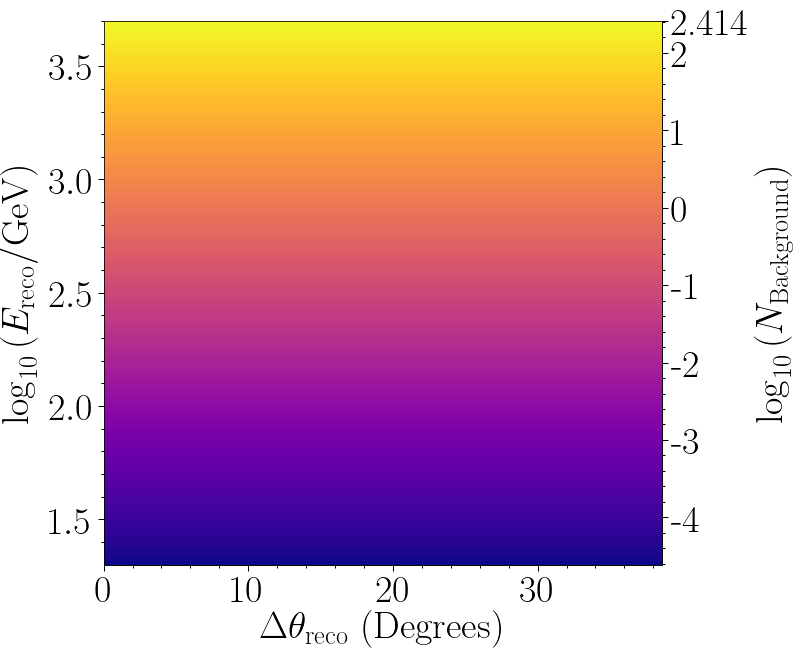

In [56]:
makeBackgroundHeatMap("course", bigFont=True, save=False)

In [18]:
chs = [5,8,11]
ms  = [500, 1000,3000,5000,10000]
_   = ["course", "fine"]
for blah in _:
#     makeBackgroundHeatMap(blah, save=True, bigFont=True)
    for m in ms:
        for ch in chs:
#             makeRatioHeatMap(ch, m, blah, save=True, bigFont=True)
            makeSignalHeatMap(ch, m, blah, save=True, bigFont=True)

NameError: name 'makeSignalHeatMap' is not defined

## This makes that plot ##

In [7]:
chs = [5,8,11]
mChis = [500,1000, 5000, 10000]
bigFonts = [True,False]

# for ch in chs:
#     for mChi in mChis:
#         for bigFont in bigFonts:
#             makeRatioHeatMap(ch,mChi=mChi,bigFont=bigFont,save=True)

makeRatioHeatMap(8,1000, bigFont=True)



NameError: name 'makeRatioHeatMap' is not defined

In [ ]:
makeSignalHeatMap(5, 500, "fine",save=True, bigFont=True)

In [19]:
ww1000 = Signal(8, 1000)
ww500  = Signal(8, 500)

In [20]:
bb500  = Signal(5,500)
bb1000 = Signal(5,1000)
ww500  = Signal(8,500)
ww1000 = Signal(8,1000)
tt500  = Signal(11,500)
tt1000 = Signal(11,1000)

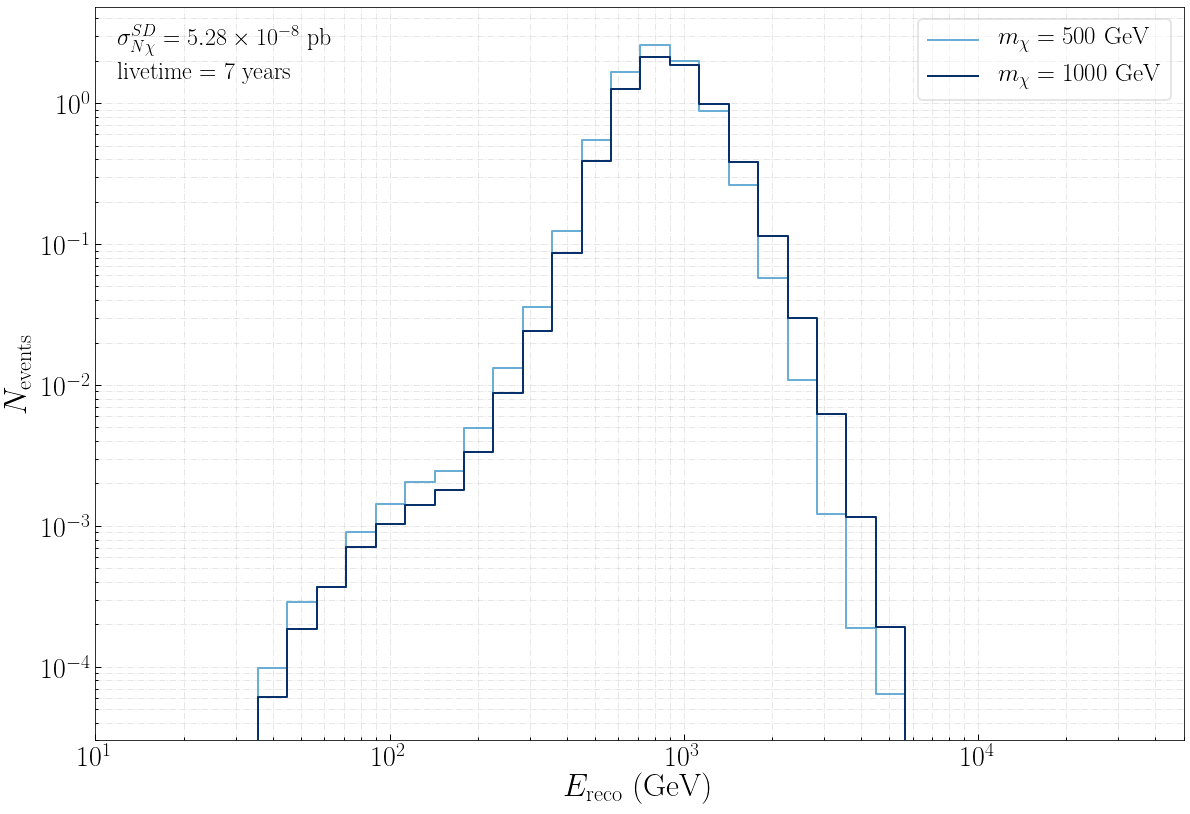

In [21]:
binsPerDecade = 10
highExp       = 6.5
lowExp        = 0.5
eBins         = np.logspace(lowExp, highExp, int(binsPerDecade * (highExp-lowExp) + 1))

numLines  = 3
cmap      = plt.get_cmap('Blues')
cNorm     = colors.Normalize(vmin=0, vmax=numLines-1)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)

xcLims = xcl.Limits(8)

fig = plt.figure(figsize=(19.5,13.5))

ax  = fig.add_subplot(111)
ax.step(eBins[1:], ww500.eCourse,  color=scalarMap.to_rgba(1), label=r"$m_{\chi}=500$ \rm{GeV}", where="mid")
ax.step(eBins[1:], ww1000.eCourse, color=scalarMap.to_rgba(2), label=r"$m_{\chi}=1000$ \rm{GeV}", where="mid")
# plt.plot(centers, bgHist[0], label=r"Background", color="slategrey", 
#          linestyle="--", drawstyle="steps", lw=2)


at = AnchoredText("$ \\sigma_{N \\chi}^{SD}=5.28 \\times 10^{-8}$ pb \n livetime~=~7 years", prop=dict(size=24), 
                            frameon=False,
                            loc='upper left')
at.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
ax.add_artist(at)

ax.loglog()
ax.set_xlim(10,5e4)
ax.set_ylim(bottom=3.e-5)
ax.legend(loc="best", framealpha=0.5, fontsize=25)
ax.grid(linewidth=1, which = 'both', alpha = 0.3,ls='-.')
ax.set_xlabel(r"$E_{\rm{reco}}$ (GeV)", fontsize=32)
ax.set_ylabel(r"$N_{\rm{events}}$", fontsize=32)
ax.tick_params(which="both", labelsize=28, direction="in")

# plt.savefig("/Users/jlazar/Documents/IceCube/data/ch5_exp_num_events.png")
# plt.savefig("/Users/jlazar/Documents/IceCube/data/ch5_exp_num_events_no_bg.png")
plt.savefig("data/plots/gooder_plot.pdf",dpi=600,bbox_inches='tight')
plt.show()

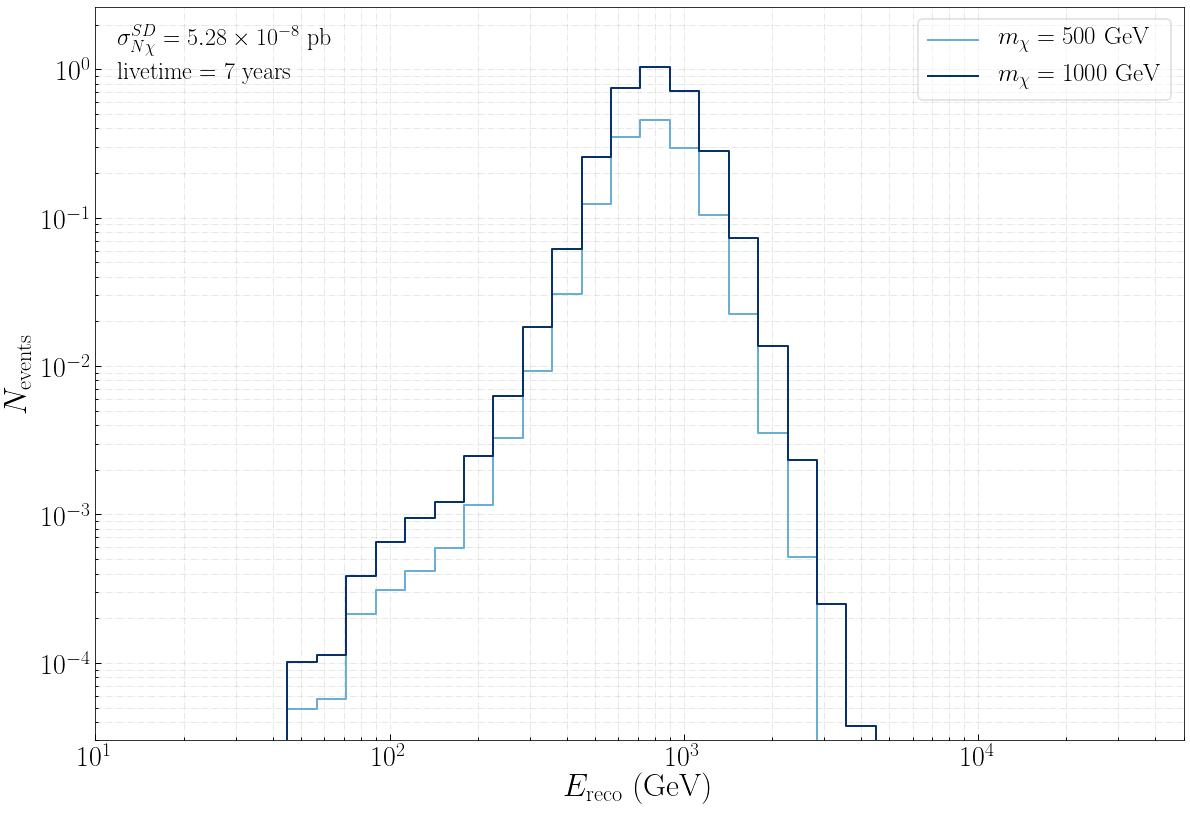

In [22]:
binsPerDecade = 10
highExp       = 6.5
lowExp        = 0.5
eBins         = np.logspace(lowExp, highExp, int(binsPerDecade * (highExp-lowExp) + 1))

numLines  = 3
cmap      = plt.get_cmap('Blues')
cNorm     = colors.Normalize(vmin=0, vmax=numLines-1)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)

xcLims = xcl.Limits(8)

fig = plt.figure(figsize=(19.5,13.5))

ax  = fig.add_subplot(111)
ax.step(eBins[1:], bb500.eCourse,  color=scalarMap.to_rgba(1), label=r"$m_{\chi}=500$ \rm{GeV}", where="mid")
ax.step(eBins[1:], bb1000.eCourse, color=scalarMap.to_rgba(2), label=r"$m_{\chi}=1000$ \rm{GeV}", where="mid")
# plt.plot(centers, bgHist[0], label=r"Background", color="slategrey", 
#          linestyle="--", drawstyle="steps", lw=2)


at = AnchoredText("$ \\sigma_{N \\chi}^{SD}=5.28 \\times 10^{-8}$ pb \n livetime~=~7 years", prop=dict(size=24), 
                            frameon=False,
                            loc='upper left')
at.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
ax.add_artist(at)

ax.loglog()
ax.set_xlim(10,5e4)
ax.set_ylim(bottom=3.e-5)
ax.legend(loc="best", framealpha=0.5, fontsize=25)
ax.grid(linewidth=1, which = 'both', alpha = 0.3,ls='-.')
ax.set_xlabel(r"$E_{\rm{reco}}$ (GeV)", fontsize=32)
ax.set_ylabel(r"$N_{\rm{events}}$", fontsize=32)
ax.tick_params(which="both", labelsize=28, direction="in")

# plt.savefig("/Users/jlazar/Documents/IceCube/data/ch5_exp_num_events.png")
# plt.savefig("/Users/jlazar/Documents/IceCube/data/ch5_exp_num_events_no_bg.png")
plt.savefig("data/plots/gooder_plot.pdf",dpi=600,bbox_inches='tight')
plt.show()

In [2]:
def signal_heatmap(ch, m, binning, trim_i=81, show=True, save=False, l_e_min=1, l_e_max=4):
    
    log_e_edges = np.linspace(6.5, 0.5, 61)
    min_e_i     = np.where(log_e_edges==l_e_min)[0][0]
    max_e_i     = np.where(log_e_edges==l_e_max)[0][0]
    print(min_e_i)
    print(max_e_i )
    
    factor      = sd_limits[ch][m] * sd_anns[m] * 1./m * 30 * 60
    
    if binning=="f":
        log_signal = np.log10(factor*np.load("data/e_d_theta_hist/ch%d_m%d_f1.000000_f_tot_e_d_theta_hist.npy" % (ch, m)))
        trim_i     = 81
    elif binning=="c":
        log_signal = np.log10(factor*np.load("data/e_d_theta_hist/ch%d_m%d_f1.000000_c_tot_e_d_theta_hist.npy" % (ch, m)))
        trim_i     = 25
    else:
        print("Invalid binning option. Binning must be 'f' or 'c'")
        quit()
    
    
    log_signal_trim = log_signal[max_e_i:min_e_i,:trim_i] # Get rid of areas of plot that are empty space
    n_tot           = np.sum(np.power(10, log_signal))
    
    fontsize = 32
    
    fig, ax = plt.subplots(1, 1, figsize=[10, 10])

    im = ax.imshow(log_signal_trim, 
                   interpolation='none', 
                   aspect="auto", 
                   extent=[0, 40.2, l_e_min, l_e_max],
                   vmin=-4, vmax=0)


    ax.set_xlabel(r"$\Delta\theta_{\rm{reco}}$ (Degrees)", fontsize=fontsize)
    ax.set_ylabel(r"$\log_{10}\left(E_{\rm{reco}}/\rm{GeV}\right)$", fontsize=fontsize)

    if ch==5:
        desc_str = r"$b\bar{b}$, $m_{\chi}=%d$ GeV" % m
    elif ch==8:
        desc_str = r"$W^{+}W^{-}$, $m_{\chi}=%d$ GeV" % m
    elif ch==11:
        desc_str = r"$\tau^{+}\tau^{-}$, $m_{\chi}=%d$ GeV" % m
    else:
        print("Channel must be in [5,8,11]")
    
    # Add channel label
    at1 = AnchoredText(desc_str, 
                       prop=dict(size=30), 
                       frameon=True,
                       loc='lower right')
    at1.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
    ax.add_artist(at1)
    
    # Add total number of events label
    at2 = AnchoredText(r"$N_{tot}$=%s" % str(round_sig_figs(n_tot, sig_figs=4)), 
                       prop=dict(size=30), 
                       frameon=True,
                       loc='lower left')
    at2.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
    ax.add_artist(at2)
    

    # Set up color bar
    axins = inset_axes(ax,
                       width="5%",  # width = 5% of parent_bbox width
                       height="100%",  # height : 100%
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0., 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0,
                       )

    cbar = fig.colorbar(im, cax=axins, ticks=makeTicks(log_signal_trim), format=ticker.FuncFormatter(tickFmt))
    cbar.set_label(r"$\log_{10}\left(N_{\rm{Signal}}\right)$", fontsize=fontsize, labelpad=10)
    
    if save:
        plt.savefig("/Users/jlazar/Documents/IceCube/data/e_d_theta_hist/ch%d_m%d_signal_heatmap.png" % (ch, m))
    if show:
        plt.show()
        
    print(n_tot)


In [20]:
# for ch in [11,8,5]:
#     for m in [300, 500, 1000, 3000, 5000, 10000]:
#         h = np.zeros(np.load("data/e_d_theta_hist/partial_hists/ch5_m1000_f1.000000_f_nu_0_energy_delta_theta_hist_im_gonna_scream.npy").shape)
#         for i in range(25):
#             h+=np.load("data/e_d_theta_hist/partial_hists/ch%d_m%d_f1.000000_f_nu_%d_energy_delta_theta_hist_im_gonna_scream.npy" % (ch,m,i))
#             h+=np.load("data/e_d_theta_hist/partial_hists/ch%d_m%d_f1.000000_f_nuBar_%d_energy_delta_theta_hist_im_gonna_scream.npy" % (ch,m,i))
#         np.save("data/e_d_theta_hist/ch%d_m%d_f1.000000_f_tot_e_d_theta_hist.npy" % (ch,m), h.T[::-1])

(5, 500)
55
18


/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


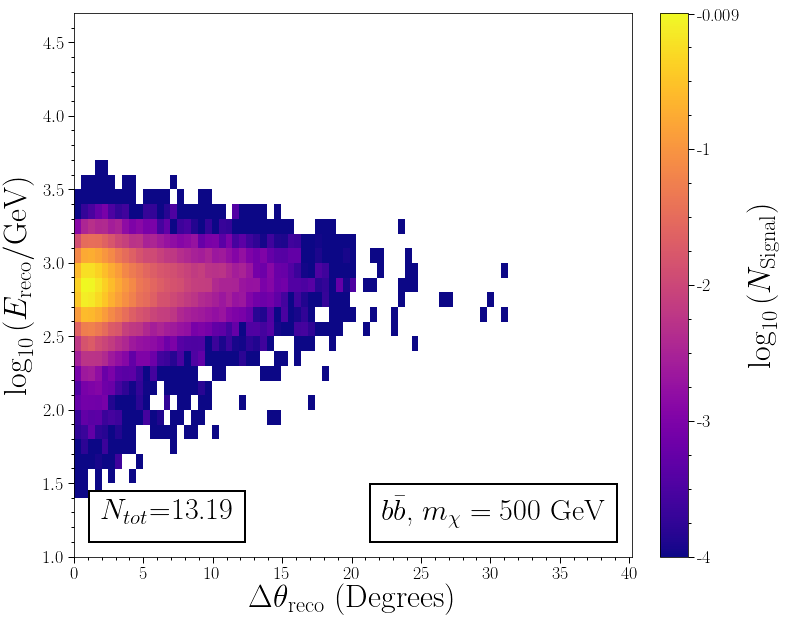

13.192016528550475
(5, 1000)
55
18


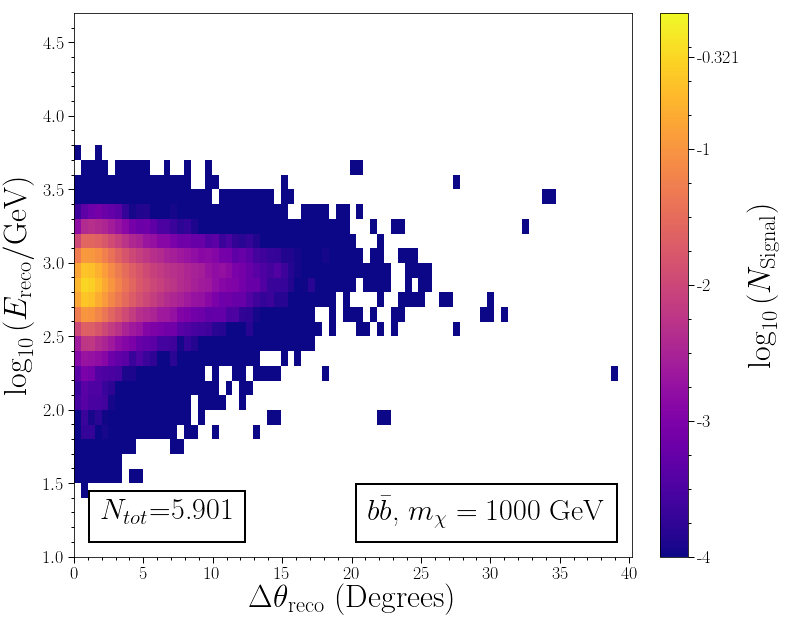

5.900900495039896
(5, 3000)
55
18


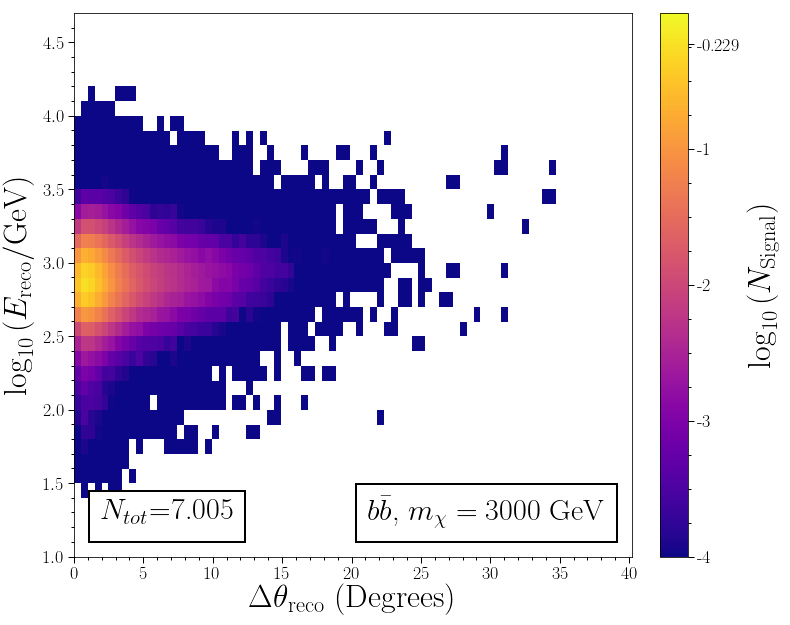

7.005215233308439
(5, 5000)
55
18


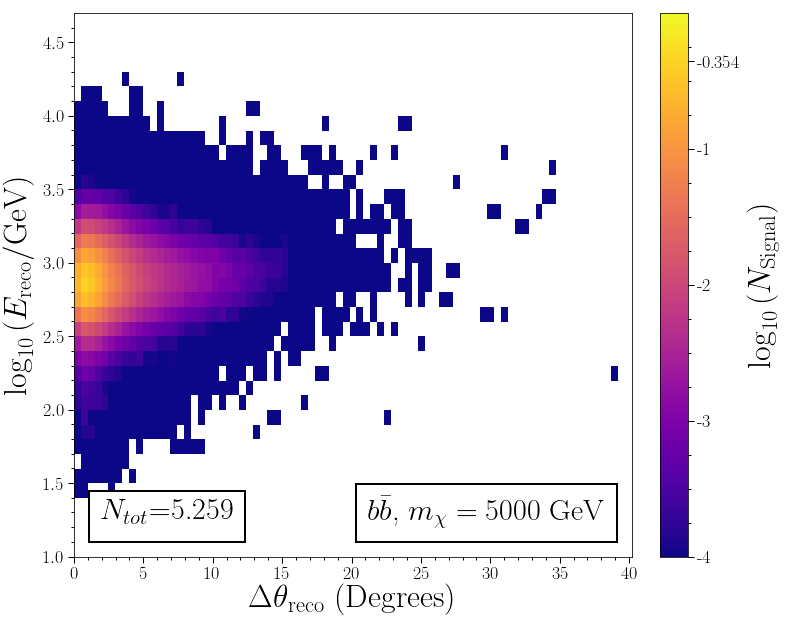

5.258633642383922
(5, 10000)
55
18


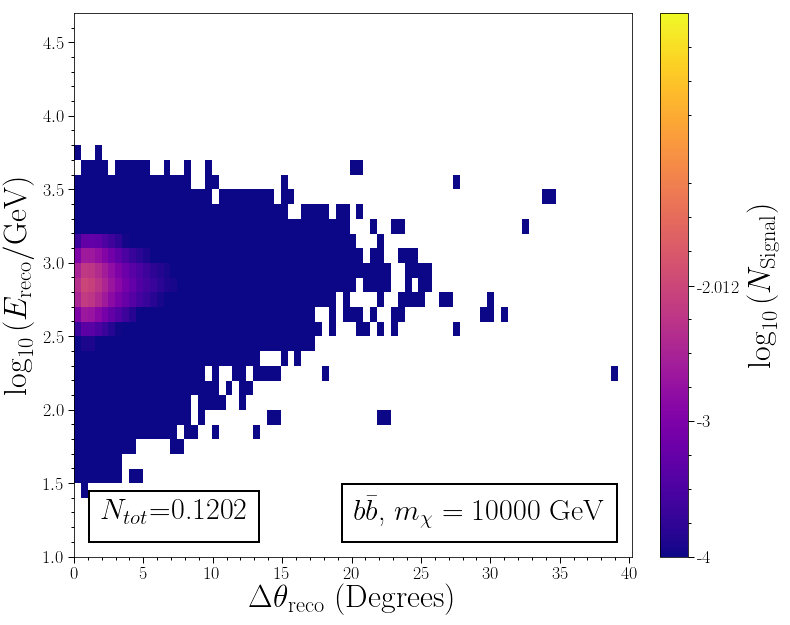

0.1201878378365261
(8, 500)
55
18


/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


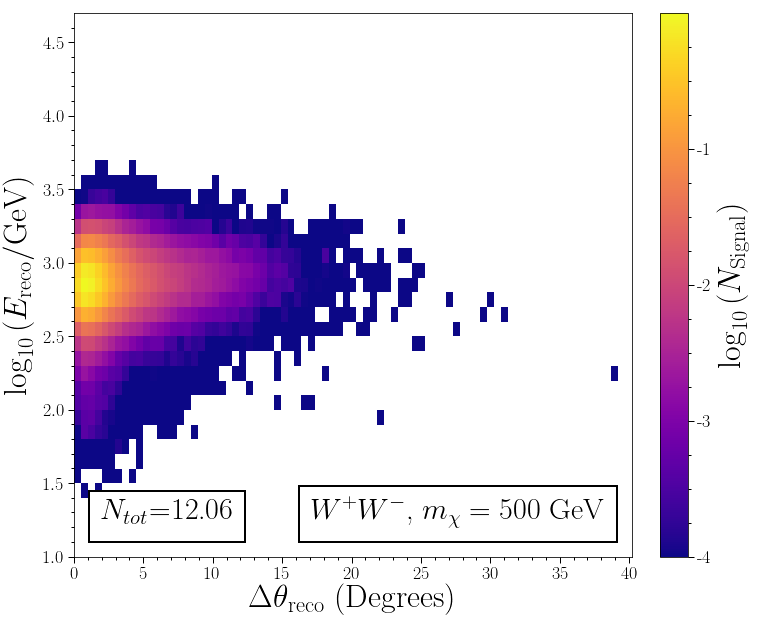

12.06024841615693
(8, 1000)
55
18


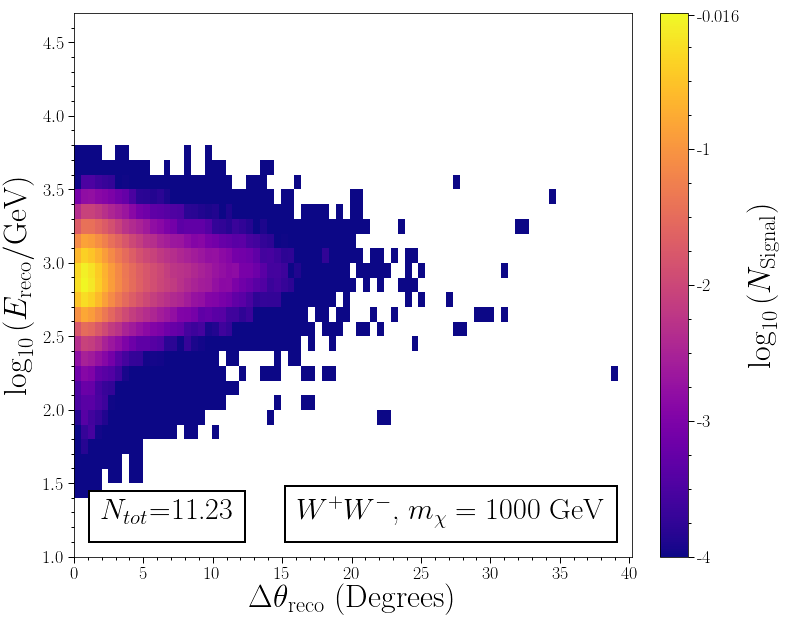

11.23469520667508
(8, 3000)
55
18


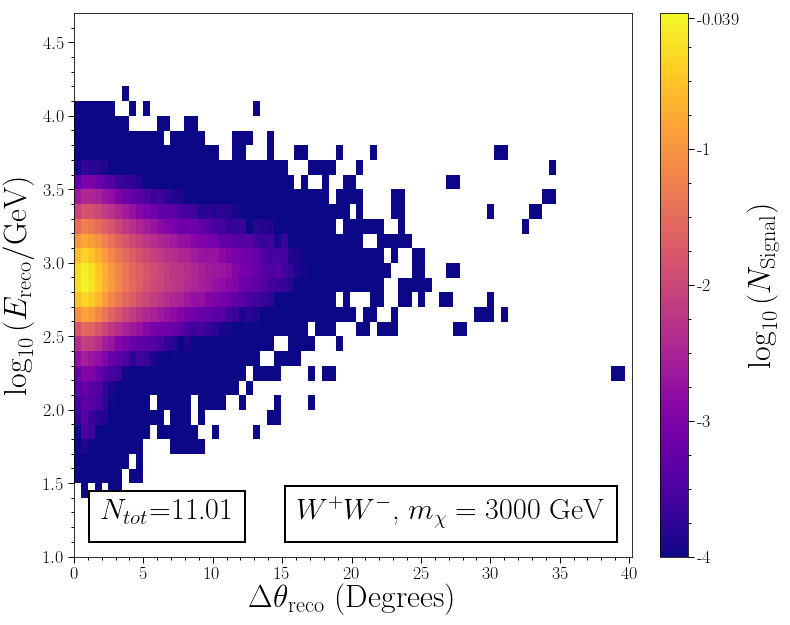

11.009387845701973
(8, 5000)
55
18


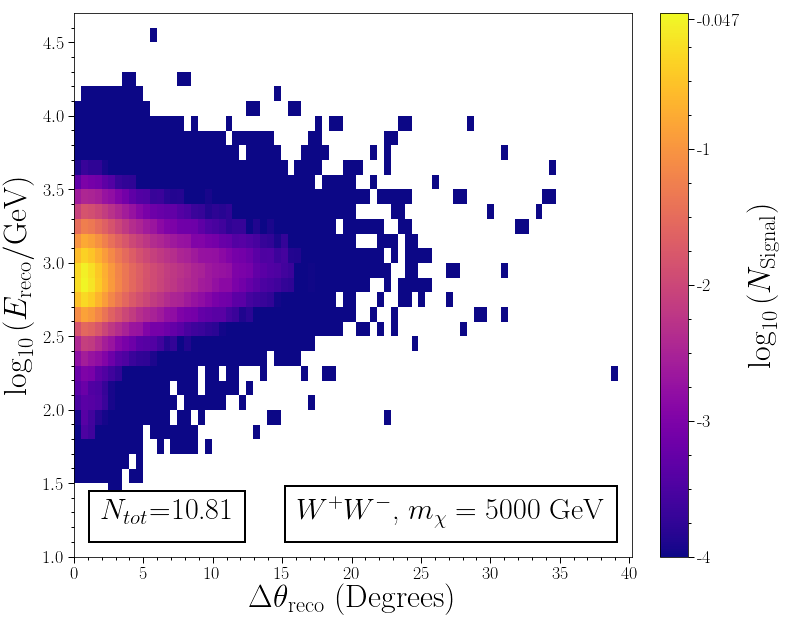

10.814713848839789
(8, 10000)
55
18


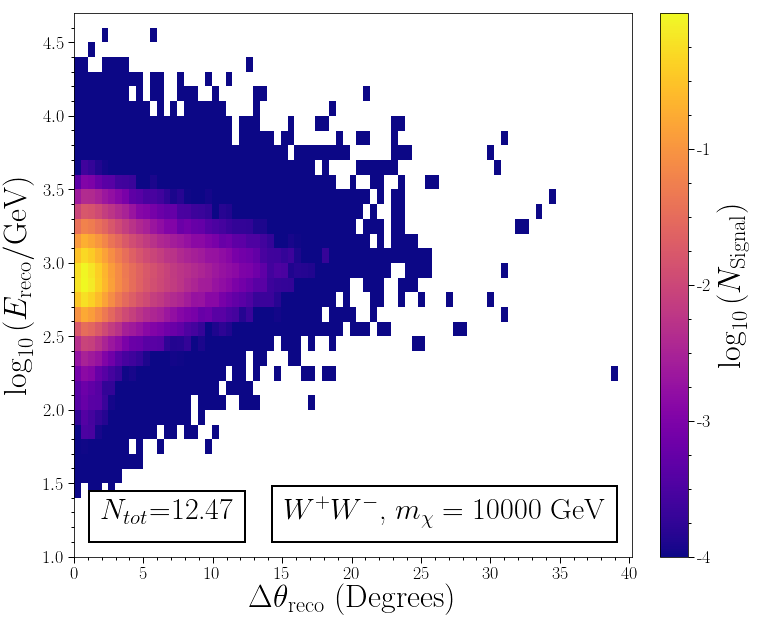

12.470400323943798
(11, 500)
55
18


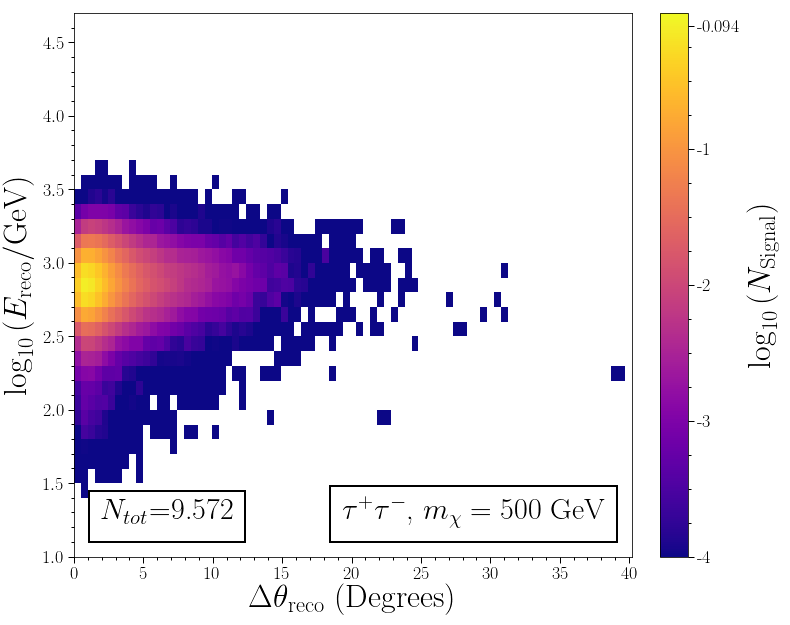

9.572295857694034
(11, 1000)
55
18


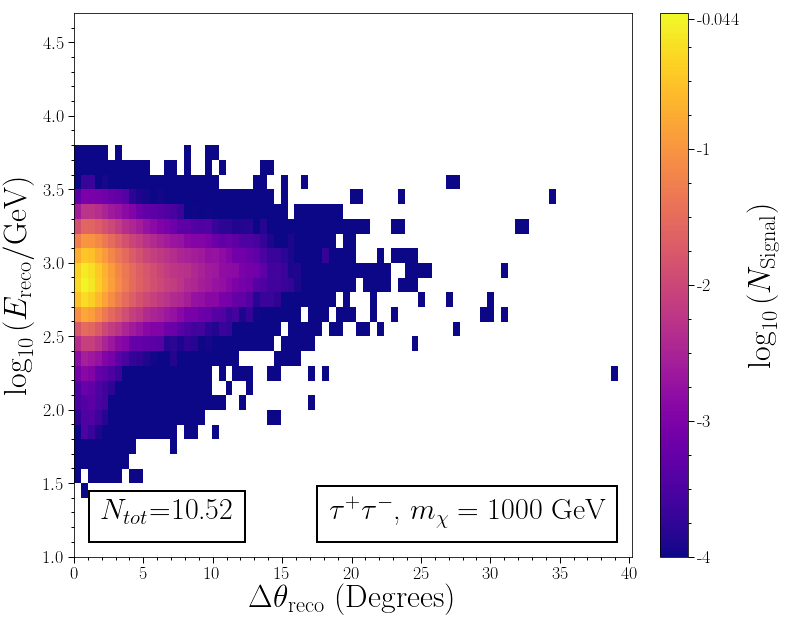

10.51661682292908
(11, 3000)
55
18


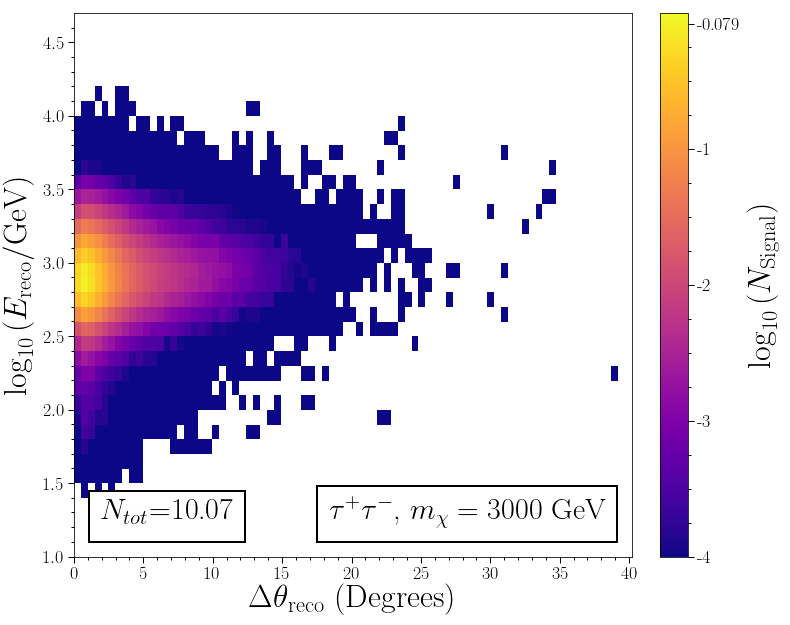

10.071434988315902
(11, 5000)
55
18


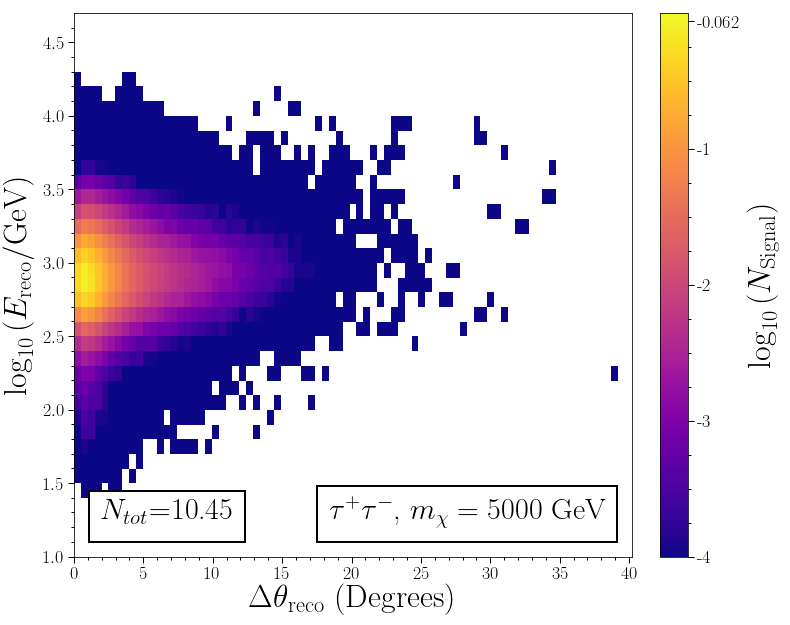

10.44548688514626
(11, 10000)
55
18


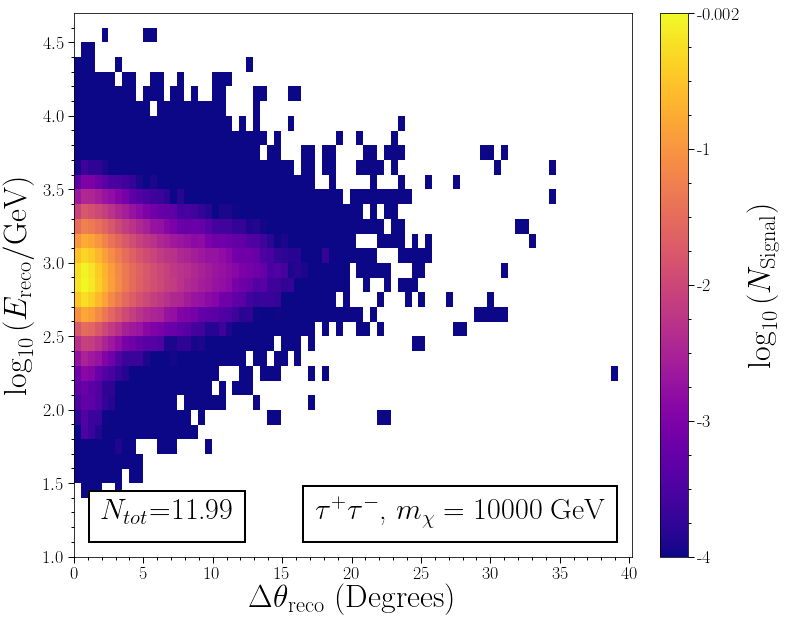

11.994102182397338


In [21]:
chs = [5,8,11]
ms  = [500, 1000, 3000, 5000, 10000]

for ch in chs:
    for m in ms:
        print(ch, m)
        signal_heatmap(ch, m, "f", l_e_max=4.7, save=False)

In [37]:
def bg_heatmap(trim_i=81, show=True, save=False, l_e_min=1, l_e_max=4):
    
    log_e_edges = np.linspace(6.5, 0.5, 61)
    min_e_i     = np.where(log_e_edges==l_e_min)[0][0]
    max_e_i     = np.where(log_e_edges==l_e_max)[0][0]
    
#     k_bg = np.load("data/e_d_theta_hist/kaon_tot_energy_delta_theta_hist_bg.npy")
#     kb_bg = np.load("data/e_d_theta_hist/kaon_bar_tot_energy_delta_theta_hist_bg.npy")
#     p_bg = np.load("data/e_d_theta_hist/pion_tot_energy_delta_theta_hist_bg.npy")
#     pb_bg = np.load("data/e_d_theta_hist/pion_bar_tot_energy_delta_theta_hist_bg.npy")
#     tot_bg = k_bg+kb_bg+p_bg+pb_bg
    tot_bg = np.load("data/e_d_theta_hist/bg_tot_e_d_theta_hist.npy")
    
    
    log_signal      = np.log10(tot_bg).T[::-1]
    log_signal_trim = log_signal[max_e_i:min_e_i,:trim_i] # Get rid of areas of plot that are empty space
#     log_signal_trim = log_signal_trim[np.where(log_signal_trim>-3)]
    n_tot           = np.sum(np.power(10, log_signal))
    
    fontsize = 32
    
    fig, ax = plt.subplots(1, 1, figsize=[10, 10])

    im = ax.imshow(log_signal_trim, 
                   interpolation='none', 
                   aspect="auto", 
                   extent=[0, 40.2, l_e_min, l_e_max],
                  )


    ax.set_xlabel(r"$\Delta\theta_{\rm{reco}}$ (Degrees)", fontsize=fontsize)
    ax.set_ylabel(r"$\log_{10}\left(E_{\rm{reco}}/\rm{GeV}\right)$", fontsize=fontsize)

#     if ch==5:
#         desc_str = r"$b\bar{b}$, $m_{\chi}=%d$ GeV" % m
#     elif ch==8:
#         desc_str = r"$W^{+}W^{-}$, $m_{\chi}=%d$ GeV" % m
#     elif ch==11:
#         desc_str = r"$\tau^{+}\tau^{-}$, $m_{\chi}=%d$ GeV" % m
#     else:
#         print("Channel must be in [5,8,11]")
    
    # Add channel label
#     at1 = AnchoredText(desc_str, 
#                        prop=dict(size=30), 
#                        frameon=True,
#                        loc='lower right')
#     at1.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
#     ax.add_artist(at1)
    
    # Add total number of events label
    at2 = AnchoredText(r"$N_{tot}$=%s" % str(round_sig_figs(n_tot, sig_figs=4)), 
                       prop=dict(size=30), 
                       frameon=True,
                       loc='lower left')
    at2.patch.set_boxstyle("round, pad=0.,rounding_size=0.")
    ax.add_artist(at2)
    

    # Set up color bar
    axins = inset_axes(ax,
                       width="5%",  # width = 5% of parent_bbox width
                       height="100%",  # height : 100%
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0., 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0,
                       )

    cbar = fig.colorbar(im, cax=axins, ticks=makeTicks(log_signal_trim), format=ticker.FuncFormatter(tickFmt))
    cbar.set_label(r"$\log_{10}\left(N_{\rm{Background}}\right)$", fontsize=fontsize, labelpad=10)
    
    if save:
        plt.savefig("/Users/jlazar/Documents/IceCube/data/e_d_theta_hist/bg_heatmap.png" % (ch, m))
    if show:
        plt.show()
        
    print(n_tot)


/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


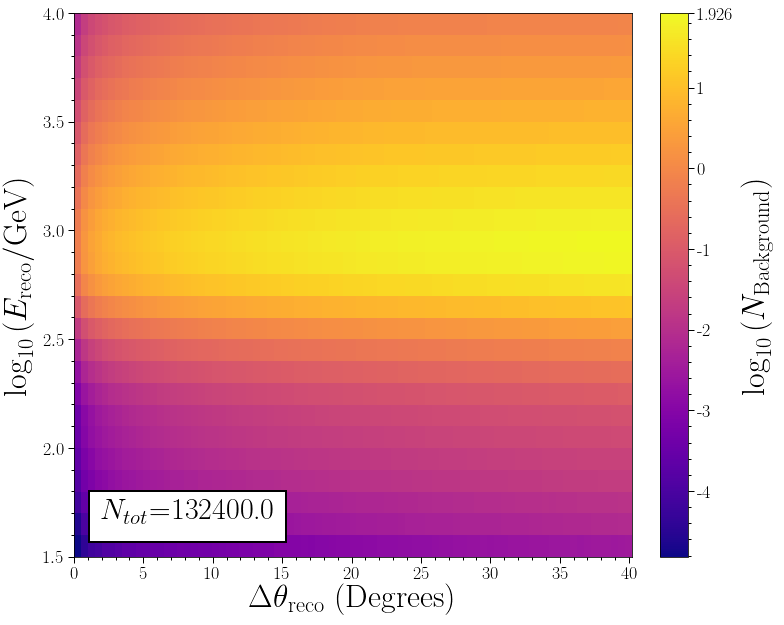

132435.66095861286


In [38]:
bg_heatmap(trim_i=81, show=True, save=False, l_e_min=1.5, l_e_max=4)

60


[]

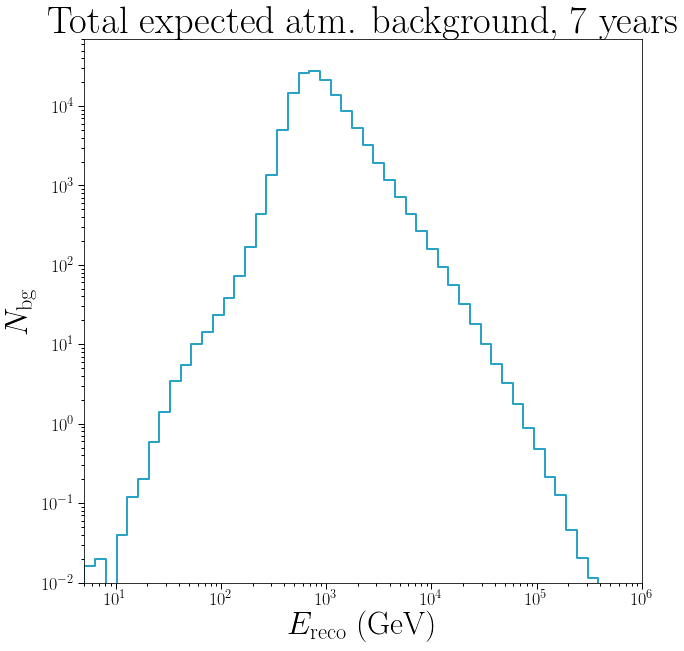

In [39]:
tot_bg = np.load("data/e_d_theta_hist/bg_tot_e_d_theta_hist.npy")
print(len( np.sum(tot_bg, axis=0)))
plt.step(np.logspace(0.5,6.5,60), np.sum(tot_bg, axis=0))

plt.title("Total expected atm. background, 7 years")
plt.xlabel(r"$E_{\rm{reco}}$ (GeV)")
plt.ylabel(r"$N_{\rm{bg}}$")

plt.ylim(1e-2, 7e4)
plt.xlim(5, 1e6)
plt.loglog()


In [31]:
h = np.zeros(np.load("data/e_d_theta_hist/partial_hists/kaon_f_0_energy_delta_theta_hist_bg.npy").shape)
for i in range(10):
    h += np.load("data/e_d_theta_hist/partial_hists/kaon_f_%d_energy_delta_theta_hist_bg.npy" % i)
    h += np.load("data/e_d_theta_hist/partial_hists/pion_f_%d_energy_delta_theta_hist_bg.npy" % i)
    h += np.load("data/e_d_theta_hist/partial_hists/kaon_bar_f_%d_energy_delta_theta_hist_bg.npy" % i)
    h += np.load("data/e_d_theta_hist/partial_hists/pion_bar_f_%d_energy_delta_theta_hist_bg.npy" % i)
np.save("data/e_d_theta_hist/bg_tot_e_d_theta_hist.npy", h)

In [57]:
ch = 5
for m in [300,500,1000,3000,5000,10000]:
    h = np.zeros(np.load("data/e_d_theta_hist/partial_hists/ch5_m1000_f1.000000_nu_18_energy_delta_theta_hist_im_gonna_scream.npy").shape)
    for i in range(100):
        h+=np.load("data/e_d_theta_hist/partial_hists/ch%d_m%d_f1.000000_nu_%d_energy_delta_theta_hist_im_gonna_scream.npy" % (ch,m,i))
        h+=np.load("data/e_d_theta_hist/partial_hists/ch%d_m%d_f1.000000_nuBar_%d_energy_delta_theta_hist_im_gonna_scream.npy" % (ch,m,i))
#     print(np.sum(h)*sd_limits[ch][m] * sd_anns[m] * 1./m * 30 * 60)
    np.save("data/e_d_theta_hist/ch%d_m%d_f1.000000_c_tot_e_d_theta_hist.npy" % (ch,m), h.T[::-1])

In [3]:
a = np.load("data/e_d_theta_hist/partial_hists/ch5_m1000_f1.000000_f_nu_0_energy_delta_theta_hist_im_gonna_scream.npy")
b = np.load("data/e_d_theta_hist/partial_hists/ch5_m1000_f1.000000_f_nu_0_energy_delta_theta_hist_im_gonna_scream_test.npy")
r = a/b
r = r[~np.isnan(r)]


/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([1.32633484e-01,            inf, 3.54554149e+01,            inf,
       9.60971179e-01, 1.53111790e+00, 8.50299640e-01, 1.05446168e+00,
       8.91400808e-01, 1.04416109e+00, 1.04173252e+00, 1.14895412e+00,
       1.16139887e+00, 2.52914844e+00, 1.23955021e+00, 8.98685903e+02,
       2.21095937e+00, 1.13258879e+00, 1.87044612e+00, 6.65915647e-01,
       2.09955427e+00, 6.66361945e-01, 7.60060959e-01, 9.56370697e-01,
       9.47672499e-01, 1.01421620e+00, 9.71188322e-01, 9.74540152e-01,
       8.17522769e-01, 1.15450435e+00, 6.38470987e-01, 9.63595566e-01,
                  inf,            inf, 1.00000002e+00,            inf,
       1.13251090e+00, 6.56926713e-01, 1.02533485e+00, 4.52115326e-01,
       8.15668359e-01, 7.65697175e-01, 1.00794475e+00, 1.05676320e+00,
       8.47781307e-01, 9.11687905e-01, 1.10062631e+00, 7.68369793e-01,
       8.79841462e-01, 8.36333010e+02, 7.39099326e-01, 0.00000000e+00,
       3.18204796e-01, 0.00000000e+00,            inf, 6.39005611e-01,
      